In [1]:
projectdir = "C:/Users/ArmanAngaji/OneDrive - Universität zu Köln/Dokumente/Uni-Köln/Masterarbeit/Workspace/Julia_Master/MasterProject_Julia/"
cd(projectdir)
using Pkg; Pkg.activate(pwd())

using DataFrames, StatsBase, Plots, Statistics, LaTeXStrings, LsqFit, CSV, Pipe, ProgressMeter, StatsPlots, BSON
using Distributions, NLsolve, Roots, Random
pyplot()

try
    Turnover
catch e
    include(projectdir*"Turnover/src/Turnover.jl")
    include(projectdir*"Turnover/src/test.jl")
    using .Turnover
end
try
    SeqDataFormatting
catch e
    include("experimental_data/SeqDataFormatting.jl")
    import .SeqDataFormatting
end

include("scripts/distribution_functions.jl")
include("experimental_data/Li/Li_clustering.jl")
include("Turnover\\src\\utility.jl")

import TumorGrowth
plot(size=(1,1))

  Activating environment at `C:\Users\ArmanAngaji\OneDrive - Universität zu Köln\Dokumente\Uni-Köln\Masterarbeit\Workspace\Julia_Master\MasterProject_Julia\Project.toml`

Test Summary:             | Pass  Total
Applying turnover methods |    7      7


# load Li data

In [53]:
tumor_name = "T2"
sanger = TumorGrowth.data_import("experimental_data/Li/Li_data_$(tumor_name)_sanger.tsv", delim="\t");
# sanger.frequencies = [ones(Float64, length(m)) for m in sanger.mutations];
wes = TumorGrowth.data_import("experimental_data/Li/Li_data_$(tumor_name)_wes.tsv", delim="\t");

In [54]:
sanger_lichee = data_import("experimental_data\\Li\\Li_data_$(tumor_name)_sanger_clonetumor_lichee.tsv", delim="\t")
# sanger_lichee.frequencies = map( ones∘length, sanger_lichee.mutations)

lichee_clones =data_import("experimental_data\\Li\\Li_data_$(tumor_name)_clones_lichee.tsv", delim="\t")
# lichee_tree = Dict( collect( keys(lichee_tree) ) .=> replace( collect( values(lichee_tree) ), Int[]=>[-1]) )

# sanger_coinc = TumorGrowth.data_import("experimental_data\\Li\\Li_data_$(tumor_name)_sanger_clones_coinc.tsv", delim="\t")
# sanger_coinc.frequencies = map( ones∘length, sanger_coinc.mutations)
;

In [55]:
n = nrow(sanger)
min_samples = 2
N = 2*n / min_samples
println(N)

turnover_params = ( f_min = min_samples, Nthresh_orph = N, Nthresh_estr = N, )

tumor = DataFrame( index=lichee_clones.index, mutations=lichee_clones.clone)

Lmax = length( union( tumor.mutations...) ) / length( union( wes.mutations...) )

freqs = SeqDataFormatting.mfreqs(wes) |> df -> Dict(df.mutation .=> df.frequency)
samplecounts = TumorGrowth.mutation_freqs(sanger) |> df -> Dict(df.mutation .=> df.reads);

159.0


### *plot tree*

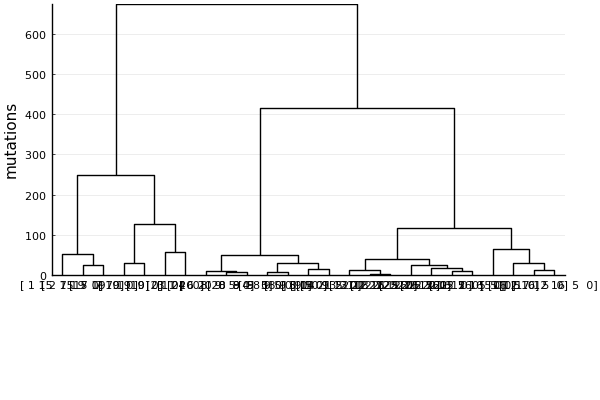

C:\Users\arman\.julia\conda\conda_jl\lib\site-packages\matplotlib\text.py:1242: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [5]:
mut_dists = pairwise((c1,c2)-> length(c1)+length(c2)-2*length(intersect(c1,c2)), lichee_clones.clone)
hcl = hclust(mut_dists , linkage = :ward)
lineages = map(c->lineage(c;offspring2parent=Dict(lichee_clones.index .=> lichee_clones.parent)), 1:size(mut_dists,1))
ticks=1:size(mut_dists,1)
xticks = (getindex(1:size(mut_dists,1), [findfirst(isequal(tick), hcl.order) for tick in ticks]),lineages)
plot(hcl; useheight=true, xticks=xticks, xrotation=45, bottom_margin=28Plots.mm, ylabel="mutations")

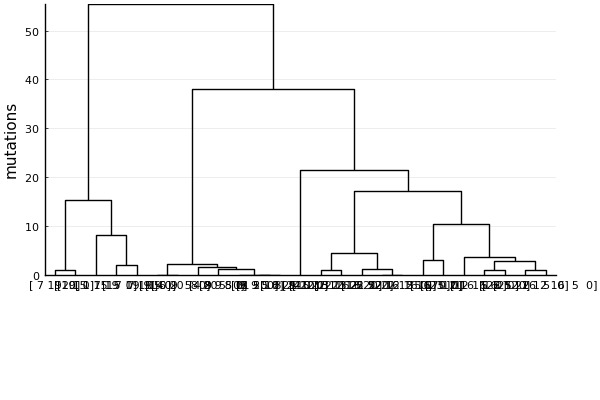

C:\Users\ArmanAngaji\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [6]:
L = 0.1
mut_dists = pairwise((c1,c2)-> length(c1)+length(c2)-2*length(intersect(c1,c2)), TumorGrowth.reduced_mu(tumor, L).mutations)
hcl = hclust(mut_dists , linkage = :ward)
lineages = map(c->lineage(c;offspring2parent=Dict(lichee_clones.index .=> lichee_clones.parent)), 1:size(mut_dists,1))
ticks=1:size(mut_dists,1)
xticks = (getindex(1:size(mut_dists,1), [findfirst(isequal(tick), hcl.order) for tick in ticks]),lineages)
plot(hcl; useheight=true, xticks=xticks, xrotation=45, bottom_margin=28Plots.mm, ylabel="mutations")

> T1

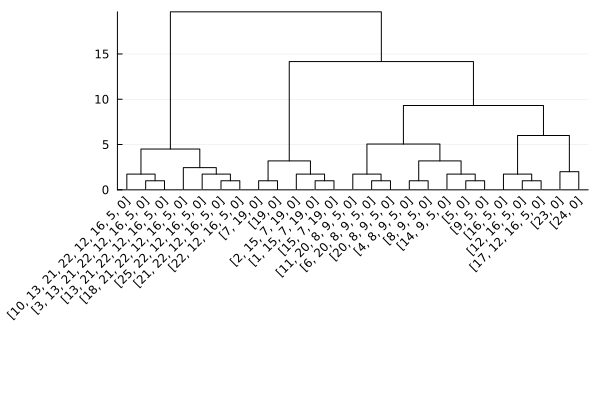

In [28]:
plot_tree(Dict(lichee_clones.index .=> lichee_clones.parent);  left_margin=22Plots.mm)

> T1 upper cutoff 0.3

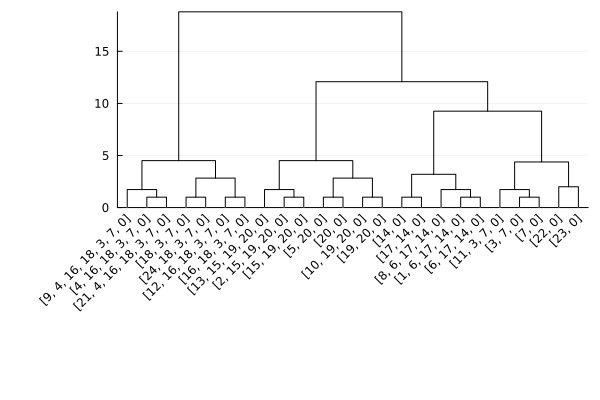

In [33]:
plot_tree(Dict(lichee_clones.index .=> lichee_clones.parent);  left_margin=22Plots.mm)

> T2

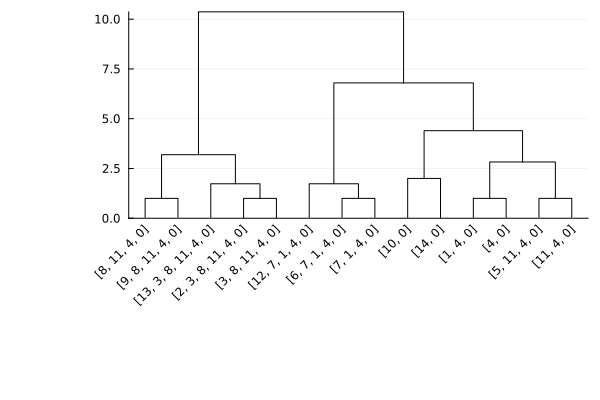

In [22]:
plot_tree(Dict(lichee_clones.index .=> lichee_clones.parent);  left_margin=22Plots.mm)

> T2 upper cutoff 0.3

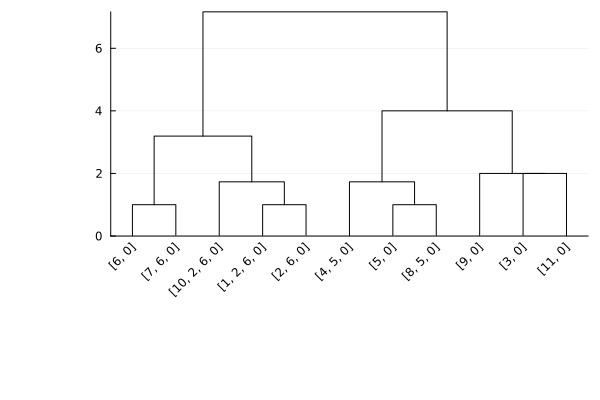

In [14]:
plot_tree(Dict(lichee_clones.index .=> lichee_clones.parent);  left_margin=22Plots.mm)

# run parameter

> T1

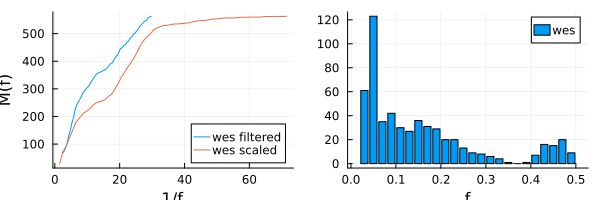

In [39]:
mutations = union(tumor.mutations...)
p = plot(layout=(1,2), size=(600,200))
M!(p[1], [freqs[m] for m in mutations], lab="wes filtered")
M!( p[1], collect(values(freqs)), scale=1/length(freqs)*length(mutations), lab="wes scaled", legend=:bottomright)
vaf_dist!(p[2], [freqs[m] for m in mutations], lab="wes", nBins=30)

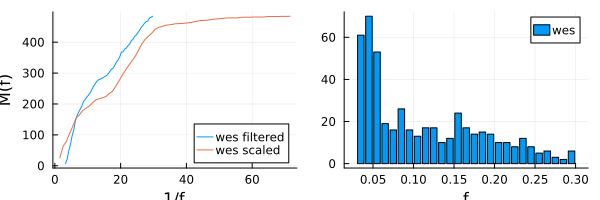

In [34]:
mutations = union(tumor.mutations...)
p = plot(layout=(1,2), size=(600,200))
M!(p[1], [freqs[m] for m in mutations], lab="wes filtered")
M!( p[1], collect(values(freqs)), scale=1/length(freqs)*length(mutations), lab="wes scaled", legend=:bottomright)
vaf_dist!(p[2], [freqs[m] for m in mutations], lab="wes", nBins=30)

> T2

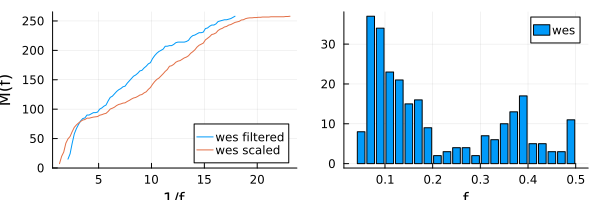

In [44]:
mutations = union(tumor.mutations...)
p = plot(layout=(1,2), size=(600,200))
M!(p[1], [freqs[m] for m in mutations], lab="wes filtered")
M!( p[1], collect(values(freqs)), scale=1/length(freqs)*length(mutations), lab="wes scaled", legend=:bottomright)
vaf_dist!(p[2], [freqs[m] for m in mutations], lab="wes", nBins=30)

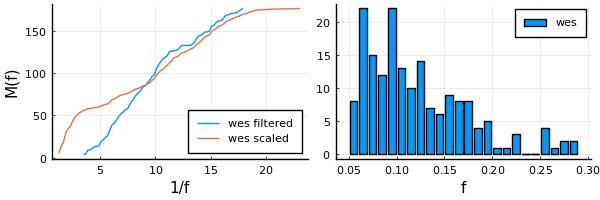

In [103]:
mutations = union(tumor.mutations...)
p = plot(layout=(1,2), size=(600,200))
M!(p[1], [freqs[m] for m in mutations], lab="wes filtered")
M!( p[1], collect(values(freqs)), scale=1/length(freqs)*length(mutations), lab="wes scaled", legend=:bottomright)
vaf_dist!(p[2], [freqs[m] for m in mutations], lab="wes", nBins=30)

In [7]:
# ds = map( 0.5:0.1:1. ) do L
#     map( 1:100 ) do _
#         orphaned_tumor = DataFrame( mutations = unique( 
#                 filter.(m-> samplecounts[m] > turnover_params[:f_min], tumor.mutations) ) )
#         orphaned_tumor = TumorGrowth.reduced_μ(orphaned_tumor, L)

#         # get d
#         W_l = orphaned_red_treeless(orphaned_tumor) |> 
#             df -> sum( df.isorphaned ) / sum( df.isgreen )

#         d_solve = try
#             fzero(x -> min(1., Turnover.W_orphaned( x;
#                         N= turnover_params[:Nthresh_orph]*(1-x))) - W_l, 0.001, 0.999)
#         catch e
#             e isa ArgumentError && NaN
#         end
#     end
# end
# filter!.(!isnan, ds)
# ds = vcat(ds...)
# d_solve = median(ds)

# estranged_tumor = DataFrame(mutations = filter( muts -> all(  samplecounts[m] > turnover_params[:f_min] for m in muts), tumor.mutations) )
# # get mu
# W_c = estranged_treeless(estranged_tumor) |> df -> sum( df.isestranged ) / sum( df.isgreen ) #|> mes2theory_estranged

# # mu_solve, n = bisection(mu -> min(1., W_estranged(d_solve; b=1, μ=mu, T=log(turnover_params[:Nthresh_estr])/(1-d_solve)))- W_c, [0.01,0.99], 100)
# mu_solve = fzero(mu -> min(1., W_estranged(d_solve; b=1., μ=mu,
#             T=log(turnover_params[:Nthresh_estr]*(1-d_solve))/(1-d_solve)))- W_c, 0.001, 0.999)

# Ls = 0.4:0.1:1.
# reps = 300
# estranged_tumors = map( Ls ) do L
#     [TumorGrowth.reduced_μ(estranged_tumor, L) for _=1:reps]
# end

# estranged_turnover = map(estranged_tumors) do set
#         filter!(!isnan, set .|> estranged_treeless .|> df -> sum( df.isestranged ) / sum( df.isgreen ))
#     end

# Ls, t = .!isempty.(estranged_turnover) |> mask -> (Ls[mask], estranged_turnover[mask])

# function model(Ls, p)
#     local mu = p[1]
#     (mu<=0. || mu>=1.) && return fill(Inf, length(Ls))
#     map( Ls ) do L
#         min(1., W_estranged(d_solve; b=1., μ=mu*L,
#                 T=log(turnover_params[:Nthresh_estr]*(1-d_solve))/(1-d_solve)))
#     end
# end
# # fitres = curve_fit(model, Ls, mean.(t), [(1-d_solve)/2])
# fitres = curve_fit(model, vcat( [ fill(Ls[i], length(t_)) for (i,t_) in enumerate(t)]... ), 
#     vcat(t...), [(1-d_solve)/2])
# mu_fit = fitres.param[1]

# tvecs = [ rand.(t) for _=1:10000 ]
# fits = map( tp-> curve_fit(model, Ls, tp, [(1-d_solve)/2]), tvecs)
# mu_fits = getindex.(getfield.(fits, :param),1);

## re-cluster samples

In [109]:
Random.seed!(1122)
ds = []
mus = []

min_samples, cutoff_hi, cutoff_lo, min_val_freq = 2, 1/2, Dict("T1"=>1/30, "T2"=>1/18), 1/5

nmuts = length(union(sanger.mutations...))
L = 0.1
@showprogress for L in L:0.05:L
    for _ in 1:50
        tumor = sanger_wes_coinc_clustering( sanger, wes; 
                min_samples = min_samples, cutoff_hi = cutoff_hi, cutoff_lo = cutoff_lo[tumor_name], 
                min_val_freq = min_val_freq, subsample_nmuts = ceil(Int,nmuts*L))
        samplecounts = TumorGrowth.mutation_freqs(tumor) |> df -> Dict(df.mutation .=> df.reads)
        
        try         
            orphaned_tumor = DataFrame( mutations = unique( 
                    filter.(m-> samplecounts[m] > turnover_params[:f_min], tumor.mutations)
                ))
            
            estranged_tumor = DataFrame(mutations = unique(
                    filter( muts -> all(  samplecounts[m] > turnover_params[:f_min] for m in muts),
                    tumor.mutations)
                ))

            # get d
            W_l = orphaned_red_treeless(orphaned_tumor) |> 
                df -> sum( df.isorphaned ) / sum( df.isgreen )
            
            d_solve = fzero(x -> min(1., Turnover.W_orphaned( x;
                            N= turnover_params[:Nthresh_orph]*(1-x))) - W_l, 0.001, 0.999)
            
            # get mu
            W_c = estranged_treeless(estranged_tumor) |> df -> sum( df.isestranged ) / sum( df.isgreen )
            
            mu_solve = fzero(mu -> min(1., W_estranged(d_solve; b=1., μ=mu*L,
                T=log(turnover_params[:Nthresh_estr]*(1-d_solve))/(1-d_solve)))- W_c, 0.001, 10)
            
            if 0.001 < d_solve < 0.999 #&& 0.001 < mu_solve < 0.999
                push!( ds, d_solve)
                push!(mus, mu_solve)
            end
        catch e
        end
    end
end

In [110]:
nmuts*L

90.60000000000001

### *L scaling analysis*

In [22]:
Lmax

0.5298013245033113

In [171]:
sort( countmap( tumor.mutations), by = length)

OrderedCollections.OrderedDict{Vector{Int64}, Int64} with 44 entries:
  []                                                                       => 67
  [387]                                                                    => 4
  [461]                                                                    => 1
  [449]                                                                    => 1
  [551]                                                                    => 12
  [615]                                                                    => 12
  [720, 754]                                                               => 1
  [753, 754, 761]                                                          => 1
  [657, 660, 679, 683]                                                     => 2
  [554, 586, 596, 616]                                                     => 1
  [720, 742, 754, 763]                                                     => 23
  [431, 449, 461, 487]                        

In [121]:
min_samples, cutoff_hi, cutoff_lo, min_val_freq = 2, 1/2, Dict("T1"=>1/30, "T2"=>1/18), 1/5

nmuts = length(union(sanger.mutations...))

906

In [16]:
for L in 0.5:-0.1:0.1
    Lmax=1/2
    println(L)
    let tumor = sanger_wes_coinc_clustering( sanger, wes; 
                min_samples = min_samples, cutoff_hi = cutoff_hi, cutoff_lo = cutoff_lo[tumor_name], 
                min_val_freq = min_val_freq, subsample_nmuts = ceil(Int,nmuts*L*Lmax))
        samplecounts = TumorGrowth.mutation_freqs(tumor) |> df -> Dict(df.mutation .=> df.reads)

        orphaned_tumor = DataFrame( mutations = unique( 
                        filter.(m-> samplecounts[m] > turnover_params[:f_min], tumor.mutations)
                    ))
        # orphaned_tumor = TumorGrowth.reduced_μ(orphaned_tumor, L)        
        
        estranged_tumor = DataFrame(mutations = unique(
                    filter( muts -> all(  samplecounts[m] > turnover_params[:f_min] for m in muts),
                    tumor.mutations)
                ))
        # estranged_tumor = TumorGrowth.reduced_μ(estranged_tumor, L)

        W_l_df = orphaned_red_treeless(orphaned_tumor) 
        W_l = sum( W_l_df.isorphaned ) / sum( W_l_df.isgreen )

        d_solve = fzero(x -> min(1., Turnover.W_orphaned( x;
                                    N= turnover_params[:Nthresh_orph]*(1-x))) - W_l,
            0.001, 0.999)

        println("\t",  round.( (nrow(W_l_df), sum(W_l_df.isorphaned), sum(W_l_df.isgreen), W_l, d_solve ), digits=2))

        # get mu
        W_c_df = estranged_treeless(estranged_tumor)
        W_c = sum( W_c_df.isestranged ) / sum( W_c_df.isgreen )
        

        mu_solve = fzero(mu -> min(1., W_estranged(d_solve; b=1., μ=mu*L,
            T=log(turnover_params[:Nthresh_estr]*(1-d_solve))/(1-d_solve)))- W_c, 0.001, 10)

        println("\t",   round.((nrow(W_c_df), sum(W_c_df.isestranged), sum(W_c_df.isgreen), W_c, mu_solve ), digits=2))
        
        @show hcat( first( sort(W_l_df, :isorphaned, rev=true), 10), first( sort(W_c_df, :isestranged, rev=true), 10),
            makeunique=true)
    end
end

0.5
	(215.0, 743.0, 7967.0, 0.09, 0.72)
	(215.0, 45.0, 60.0, 0.75, 0.49)
hcat(first(sort(W_l_df, :isorphaned, rev = true), 10), first(sort(W_c_df, :isestranged, rev = true), 10), makeunique = true) = 10×6 DataFrame
 Row │ mutation  isorphaned  isgreen  mutation_1  isestranged  isgreen_1
     │ Int64     Float64     Float64  Int64       Float64      Float64
─────┼───────────────────────────────────────────────────────────────────
   1 │      426        13.0     18.0           8          1.0        1.0
   2 │      429        13.0     18.0          19          1.0        1.0
   3 │      435        13.0     18.0         725          1.0        1.0
   4 │      437        13.0     18.0         744          1.0        1.0
   5 │      438        13.0     18.0         762          1.0        1.0
   6 │      441        13.0     18.0         702          1.0        1.0
   7 │      444        13.0     18.0         710          1.0        1.0
   8 │      447        13.0     18.0         704        

In [78]:
for L in 0.5:-0.1:0.1
    println(L)
    let tumor = sanger_wes_coinc_clustering( sanger, wes; 
                min_samples = min_samples, cutoff_hi = cutoff_hi, cutoff_lo = cutoff_lo[tumor_name], 
                min_val_freq = min_val_freq, subsample_nmuts = ceil(Int,nmuts*L*Lmax))
        samplecounts = TumorGrowth.mutation_freqs(tumor) |> df -> Dict(df.mutation .=> df.reads)

        orphaned_tumor = DataFrame( mutations = unique( 
                        filter.(m-> samplecounts[m] > turnover_params[:f_min], tumor.mutations)
                    ))
        # orphaned_tumor = TumorGrowth.reduced_μ(orphaned_tumor, L)

        estranged_tumor = DataFrame(mutations = unique(
                    filter( muts -> all(  samplecounts[m] > turnover_params[:f_min] for m in muts),
                    tumor.mutations)
                ))
        # estranged_tumor = TumorGrowth.reduced_μ(estranged_tumor, L)

        W_l_df = orphaned_red_treeless(orphaned_tumor) 
        W_l = sum( W_l_df.isorphaned ) / sum( W_l_df.isgreen )

        d_solve = fzero(x -> min(1., Turnover.W_orphaned( x;
                                    N= turnover_params[:Nthresh_orph]*(1-x))) - W_l,
            0.001, 0.999)

        println("\t",  round.( (nrow(W_l_df), sum(W_l_df.isorphaned), sum(W_l_df.isgreen), W_l, d_solve ), digits=2))

        # get mu
        W_c_df = estranged_treeless(estranged_tumor)
        W_c = sum( W_c_df.isestranged ) / sum( W_c_df.isgreen )

        mu_solve = fzero(mu -> min(1., W_estranged(d_solve; b=1., μ=mu*L,
            T=log(turnover_params[:Nthresh_estr]*(1-d_solve))/(1-d_solve)))- W_c, 0.001, 10)

        println("\t",   round.((nrow(W_c_df), sum(W_c_df.isestranged), sum(W_c_df.isgreen), W_c, mu_solve ), digits=2))
    end
end

0.5
	(227.0, 720.0, 7771.0, 0.09, 0.72)
	(227.0, 56.0, 64.0, 0.88, 0.53)
0.4
	(188.0, 531.0, 7106.0, 0.07, 0.62)
	(188.0, 44.0, 50.0, 0.88, 0.9)
0.3
	(138.0, 222.0, 2650.0, 0.08, 0.67)
	(138.0, 43.0, 49.0, 0.88, 1.03)
0.2
	(93.0, 169.0, 1102.0, 0.15, 0.89)
	(93.0, 25.0, 34.0, 0.74, 0.45)
0.1
	(47.0, 30.0, 292.0, 0.1, 0.76)
	(47.0, 16.0, 26.0, 0.62, 1.85)


### *orphans on tree*

In [131]:
mutation_turnover_scores = SeqDataFormatting.mfreqs(wes)
sanger_freqs = TumorGrowth.mutation_freqs(sanger)
mutation_turnover_scores.reads[sanger_freqs.mutation] = sanger_freqs.reads
mutation_turnover_scores.coverage[sanger_freqs.mutation] = sanger_freqs.coverage
mutation_turnover_scores.orphaned = zeros(nrow(mutation_turnover_scores))
mutation_turnover_scores.estranged = zeros(nrow(mutation_turnover_scores))
first( mutation_turnover_scores,  3)

3×6 DataFrame
 Row │ mutation  reads    coverage  frequency  orphaned  estranged 
     │ Int64     Float64  Float64   Float64    Float64   Float64   
─────┼─────────────────────────────────────────────────────────────
   1 │        1      4.0     168.0  0.0587599       0.0        0.0
   2 │        2      3.0     168.0  0.0488464       0.0        0.0
   3 │        3      1.0     168.0  0.0609229       0.0        0.0

In [132]:
for L in 0.5:-0.1:0.1
    Lmax=1/2
    let tumor_ = sanger_wes_coinc_clustering( sanger, wes; 
                min_samples = min_samples, cutoff_hi = cutoff_hi, cutoff_lo = cutoff_lo[tumor_name], 
                min_val_freq = min_val_freq, subsample_nmuts = ceil(Int,nmuts*L*Lmax))
        samplecounts = TumorGrowth.mutation_freqs(tumor_) |> df -> Dict(df.mutation .=> df.reads)

        orphaned_tumor = DataFrame( mutations = unique( 
                        filter.(m-> samplecounts[m] > turnover_params[:f_min], tumor_.mutations)
                    ))
        # orphaned_tumor = TumorGrowth.reduced_μ(orphaned_tumor, L)        
        
        estranged_tumor = DataFrame(mutations = unique(
                    filter( muts -> all(  samplecounts[m] > turnover_params[:f_min] for m in muts),
                    tumor_.mutations)
                ))
        # estranged_tumor = TumorGrowth.reduced_μ(estranged_tumor, L)

        W_l_df = orphaned_red_treeless(orphaned_tumor) 
        W_l = sum( W_l_df.isorphaned ) / sum( W_l_df.isgreen )

        d_solve = fzero(x -> min(1., Turnover.W_orphaned( x;
                                    N= turnover_params[:Nthresh_orph]*(1-x))) - W_l,
            0.001, 0.999)

        # get mu
        W_c_df = estranged_treeless(estranged_tumor)
        W_c = sum( W_c_df.isestranged ) / sum( W_c_df.isgreen )
        

        mu_solve = fzero(mu -> min(1., W_estranged(d_solve; b=1., μ=mu*L,
            T=log(turnover_params[:Nthresh_estr]*(1-d_solve))/(1-d_solve)))- W_c, 0.001, 10)
        
        mutation_turnover_scores.orphaned[W_l_df.mutation] += W_l_df.isorphaned ./ W_l_df.isgreen
        mutation_turnover_scores.estranged[W_c_df.mutation] += W_c_df.isestranged ./ W_c_df.isgreen
    end
end

In [151]:
most_orphaned = first( filter(r->!isnan(r.orphaned), sort( mutation_turnover_scores, :orphaned, rev=true)),  500)
most_estranged = first( filter(r->!isnan(r.estranged), sort( mutation_turnover_scores, :estranged, rev=true)), 500);

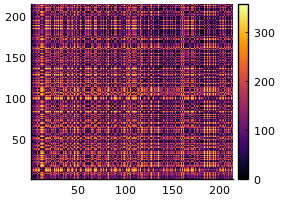

In [152]:
mutations = unique(vcat(sanger.mutations...))
mut2clone = Dict(mutations .=> map(mutations) do m
    intersect(filter(muts -> m in muts, sanger.mutations)...)
end)
coinc_clones = unique(values(mut2clone))

clone2ind = Dict(coinc_clones .=> 1:length(coinc_clones))
mut2ind = Dict(mutations .=> [ clone2ind[mut2clone[m]] for m in mutations])

dependencies = pairwise(coinc_clones, coinc_clones) do m1, m2
    length(union(setdiff(m1, m2), setdiff(m2, m1)))
end
heatmap(dependencies, size=(300,200))

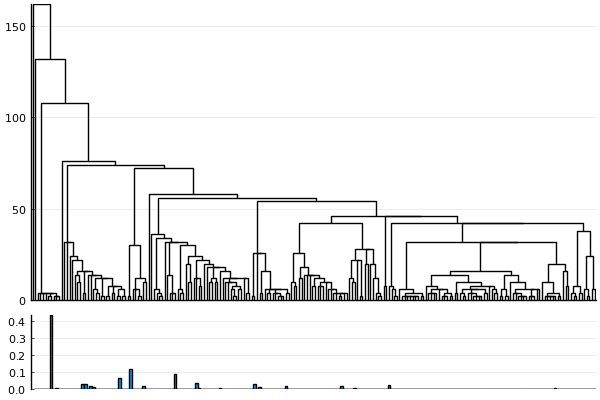

In [ ]:
using StatsPlots, Clustering

hcl = hclust(dependencies , linkage = :single)
hcl.heights .*=2

ticks = [mut2ind[m] for m in most_orphaned.mutation]

xticks = (getindex(1:nrow(mutation_turnover_scores), [findfirst(isequal(tick), hcl.order) for tick in ticks]),ticks)
plot(
    plot(hcl, useheight=true, xticks=:none),
    histogram(xticks[1], weights= most_orphaned.orphaned ./ sum(most_orphaned.orphaned),
        xticks=:none, xaxis=:off, bins=1:size(dependencies,1), ylim=(0,:auto), lab="", xlim=(0,size(dependencies,1))),  
        layout = grid(2, 1, heights=[0.8 ,0.2])
)

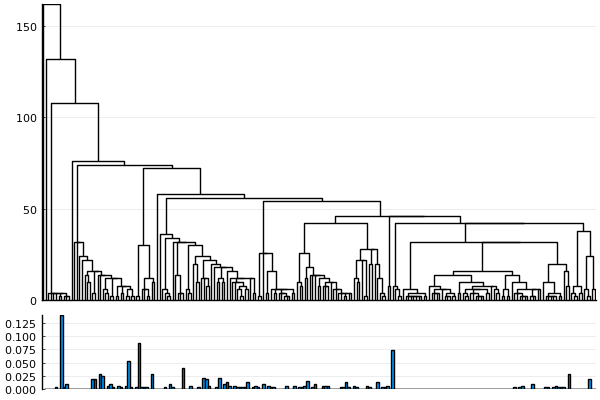

In [157]:
using StatsPlots, Clustering

hcl = hclust(dependencies , linkage = :single)
hcl.heights .*=2

ticks = [mut2ind[m] for m in most_estranged.mutation]

xticks = (getindex(1:nrow(mutation_turnover_scores), [findfirst(isequal(tick), hcl.order) for tick in ticks]),ticks)
plot(
    plot(hcl, useheight=true, xticks=:none),
    histogram(xticks[1], weights= most_estranged.estranged ./ sum(most_estranged.estranged),
        xticks=:none, xaxis=:off, bins=1:size(dependencies,1), ylim=(0,:auto), lab="", xlim=(0,size(dependencies,1))),  
        layout = grid(2, 1, heights=[0.8 ,0.2])
)

## re-sample clusters *

In [15]:
for L in [0.5,0.3,0.2,0.1,0.05, 0.03]
    println(L)
    let tumor_ = TumorGrowth.reduced_μ(tumor, L)

        orphaned_tumor = DataFrame( mutations = unique( 
                        filter.(m-> samplecounts[m] >= turnover_params[:f_min], tumor_.mutations)
                    ))
        # orphaned_tumor = TumorGrowth.reduced_μ(orphaned_tumor, L)        
        
        estranged_tumor = DataFrame(mutations = unique(
                    filter( muts -> all(  samplecounts[m] >= turnover_params[:f_min] for m in muts),
                    tumor_.mutations)
                ))
        # estranged_tumor = TumorGrowth.reduced_μ(estranged_tumor, L)

        W_l_df = orphaned_red_treeless(orphaned_tumor) 
        W_l = sum( W_l_df.isorphaned ) / sum( W_l_df.isgreen )

        d_solve = fzero(x -> min(1., Turnover.W_orphaned( x;
                                    N= turnover_params[:Nthresh_orph]*(1-x))) - W_l,
            0.001, 0.999)

        println("\t",  round.( (nrow(W_l_df), sum(W_l_df.isorphaned), sum(W_l_df.isgreen), W_l, d_solve ), digits=2))

        # get mu
        W_c_df = estranged_treeless(estranged_tumor)
        W_c = sum( W_c_df.isestranged ) / sum( W_c_df.isgreen )

        mu_solve = fzero(mu -> min(1., W_estranged(d_solve; b=1., μ=mu*L,
            T=log(turnover_params[:Nthresh_estr]*(1-d_solve))/(1-d_solve)))- W_c, 0.001, 10)

        println("\t",   round.((nrow(W_c_df), sum(W_c_df.isestranged), sum(W_c_df.isgreen), W_c, mu_solve ), digits=2))
        
        @show hcat( first( sort(W_l_df, :isorphaned, rev=true), 10), first( sort(W_c_df, :isestranged, rev=true), 10),
            makeunique=true)
    end
end

0.5
	(284.0, 2650.0, 12898.0, 0.21, 0.97)
	(284.0, 23.0, 24.0, 0.96, 0.06)
hcat(first(sort(W_l_df, :isorphaned, rev = true), 10), first(sort(W_c_df, :isestranged, rev = true), 10), makeunique = true) = 10×6 DataFrame
 Row │ mutation  isorphaned  isgreen  mutation_1  isestranged  isgreen_1
     │ Int64     Float64     Float64  Int64       Float64      Float64
─────┼───────────────────────────────────────────────────────────────────
   1 │      495        16.5     46.5         238         0.5        0.5
   2 │      498        16.5     46.5         243         0.5        0.5
   3 │      502        16.5     46.5         712         0.25       0.25
   4 │      509        16.5     46.5         715         0.25       0.25
   5 │      512        16.5     46.5         717         0.25       0.25
   6 │      515        16.5     46.5         719         0.25       0.25
   7 │      517        16.5     46.5         637         0.25       0.25
   8 │      518        16.5     46.5         639        

In [45]:
Random.seed!(1122)
ds = []
mus = []
Ls = []
Wa = []
Wo = []

# @showprogress for L in [0.03, 0.05, 0.1, 0.2, 0.4]
@showprogress for L in [0.0625, 0.125, 0.25, 0.5]

    for _ in 1:100
        try         
            tumor_ = TumorGrowth.reduced_mu(tumor, L)
            orphaned_tumor = DataFrame( mutations = unique( 
                    filter.(m-> samplecounts[m] >= turnover_params[:f_min], tumor_.mutations)
                ))
            # orphaned_tumor = TumorGrowth.reduced_mu(orphaned_tumor, L)

            estranged_tumor = DataFrame(mutations = unique(
                    filter( muts -> all(  samplecounts[m] >= turnover_params[:f_min] for m in muts),
                    tumor_.mutations)
                ))
            # println( length(union(estranged_tumor.mutations...))/length(union(tumor.mutations...)))
            # estranged_tumor = TumorGrowth.reduced_mu(estranged_tumor, L)

            # get d
            W_l = orphaned_red_treeless(orphaned_tumor) |> 
                df -> sum( df.isorphaned ) / sum( df.isgreen )

            d_solve = fzero(x -> min(1., Turnover.W_orphaned( x;
                            N= turnover_params[:Nthresh_orph]*(1-x))) - W_l, 0.0001, 0.9999)

            # get mu
            W_c = estranged_treeless(estranged_tumor) |> df -> sum( df.isestranged ) / sum( df.isgreen )

            mu_solve = fzero(mu -> min(1., W_estranged(d_solve; b=1., μ=mu*L,
                T=log(turnover_params[:Nthresh_estr]*(1-d_solve))/(1-d_solve)))- W_c, 0.0001, 10.)
            if 0.0001 < d_solve < 0.9999 && 0.0001 < mu_solve < 10.
                push!( ds, d_solve)
                push!(mus, mu_solve)
                push!( Wa, W_l)
                push!( Wo, W_c)
                push!(Ls, L)
            end
        catch e
        end
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


In [ ]:
Random.seed!(1122)
ds = []
mus = []
L = 1.
@showprogress for L in L:0.1:L
    
    tumors = map( 1:50 ) do _
        tumor_ = TumorGrowth.reduced_μ(tumor, L)
        orphaned_tumor = DataFrame( mutations = unique( 
            filter.(m-> samplecounts[m] >= turnover_params[:f_min], tumor_.mutations)
        ))
        # orphaned_tumor = TumorGrowth.reduced_μ(orphaned_tumor, L)
        estranged_tumor = DataFrame(mutations = unique(
                filter( muts -> all(  samplecounts[m] >= turnover_params[:f_min] for m in muts),
                tumor_.mutations)
            ))
        # estranged_tumor = TumorGrowth.reduced_μ(estranged_tumor, L)
        
        orphaned_tumor, estranged_tumor
    end
    
    unique!(tumors)
    
    for (orphaned_tumor, estranged_tumor) in tumors
        try         
            # get d
            W_l = orphaned_red_treeless(orphaned_tumor) |> 
                df -> sum( df.isorphaned ) / sum( df.isgreen )
            
            d_solve = fzero(x -> min(1., Turnover.W_orphaned( x;
                            N= turnover_params[:Nthresh_orph]*(1-x))) - W_l, 0.0001, 0.999)
            
            # get mu
            W_c = estranged_treeless(estranged_tumor) |> df -> sum( df.isestranged ) / sum( df.isgreen )
            
            mu_solve = fzero(mu -> min(1., W_estranged(d_solve; b=1., μ=mu*L,
                T=log(turnover_params[:Nthresh_estr]*(1-d_solve))/(1-d_solve)))- W_c, 0.0001, 10.)
            
            push!( ds, d_solve)
            push!(mus, mu_solve)
        catch e
        end
    end
end

In [227]:
last( ds), last( mus)

(0.7018826147933629, 0.26195100987699615)

# *save data*

In [46]:
data = Dict( 
    "notebook" => "Turnover/turnover_expdata_Li.ipynb",
    "data" => "experimental_data\\Li\\Li_data_$(tumor_name)_clones_lichee.tsv",
    "clustering" => "LICHeE",

    "Ls" => Ls,
    "ds"=>ds, "mus"=>mus,
    "Wa" => Wa, "Wo" => Wo,
    )
# BSON.bson("Turnover/turnover_data/Li_$(tumor_name)_inference_results_lichee.bson", data)

# T1

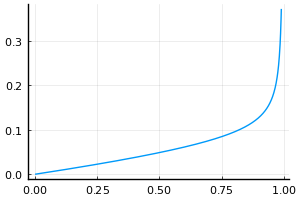

In [15]:
plot(0.:0.001:0.99, d -> Turnover.W_orphaned( d; N= turnover_params[:Nthresh_orph]*(1-d)),lab="", size=(300,200))

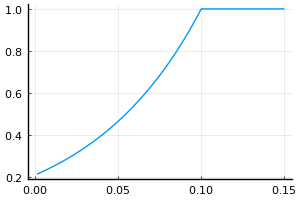

In [26]:
dplot = 0.97
Lplot = 0.3
plot(0.:0.001:0.15, mu -> min(1., W_estranged(dplot; b=1., μ=mu*Lplot,
            T=log(turnover_params[:Nthresh_estr]*(1-dplot))/(1-dplot))),lab="", size=(300,200))

## simple/coincidence clustering

> full

0.6852501155167324
0.7134144348431365


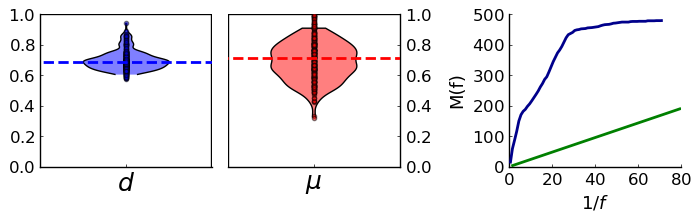

In [71]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.,1)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.0, 1)
yticks = range(ylim..., step=0.2)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus) ], c=:red, lw=2., style=:dash)
hline!(p[2], [median(mus) / Lmax ], c=:black, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,500), c=:darkblue,  scale=Lmax)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

0.7080651534989346
0.25100381300181984


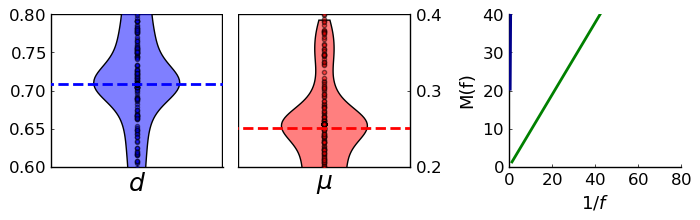

In [176]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.6, .8)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.2, 0.4)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus) ], c=:red, lw=2., style=:dash)
hline!(p[2], [median(mus) / Lmax ], c=:black, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue,  scale=Lmax)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

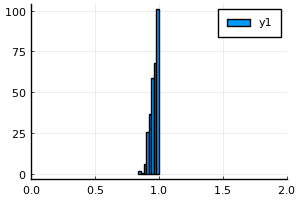

In [27]:
histogram( mus ./ (1 .- ds), size=(300,200), xlim=(0,2) )

0.6686340618321786
0.30685824060101125


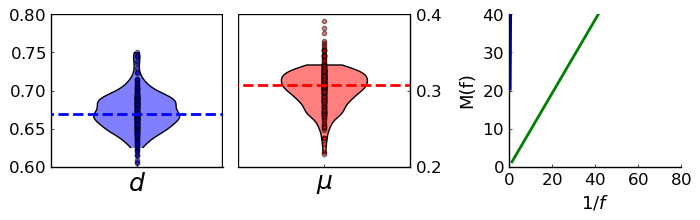

In [83]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.6, .8)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.2, 0.4)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

> sub 100

0.6860707257542543
0.3464792116414931


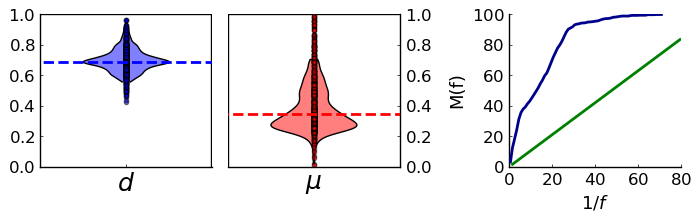

In [80]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.,1)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.0, 1)
yticks = range(ylim..., step=0.2)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus) ], c=:red, lw=2., style=:dash)
hline!(p[2], [median(mus) / Lmax ], c=:black, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue,  scale=Lmax)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

0.6860707257542543
0.25182411414567735


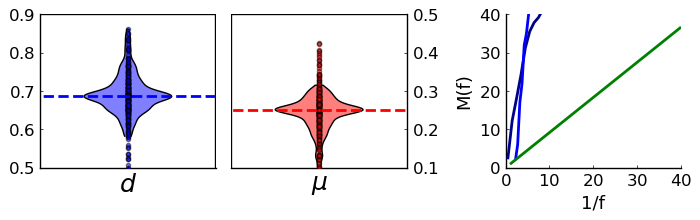

In [55]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 0.9)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.1, 0.5)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

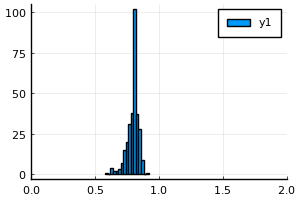

In [56]:
histogram( mus ./ (1 .- ds), size=(300,200), xlim=(0,2) )

0.6835570931974627
0.25143181652688884


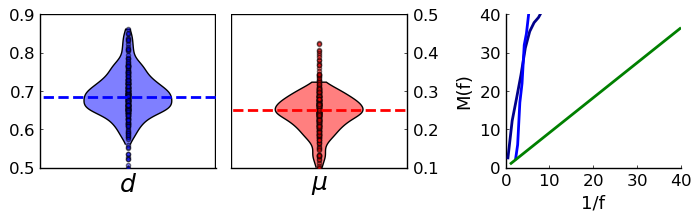

In [60]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 0.9)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.1, 0.5)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

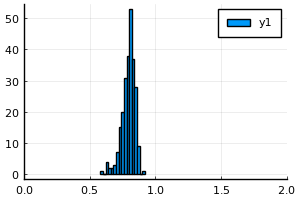

In [61]:
histogram( mus ./ (1 .- ds), size=(300,200), xlim=(0,2) )

> sub 50

0.6433563906982572
0.35302916457005906


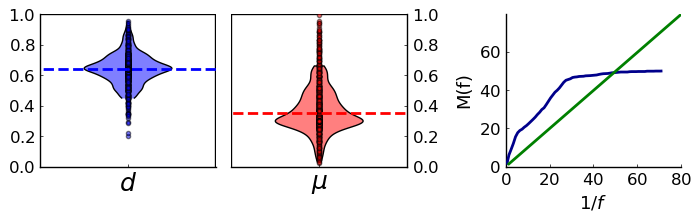

In [88]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.,1)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.0, 1)
yticks = range(ylim..., step=0.2)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus) ], c=:red, lw=2., style=:dash)
hline!(p[2], [median(mus) / Lmax ], c=:black, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue,  scale=Lmax)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

0.6433563906982572
0.29889100311990935


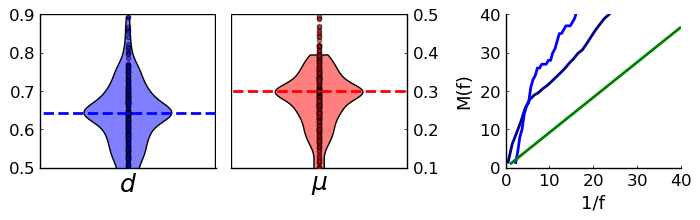

In [66]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 0.9)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.1, 0.5)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

0.6433563906982572
0.3379351624554636


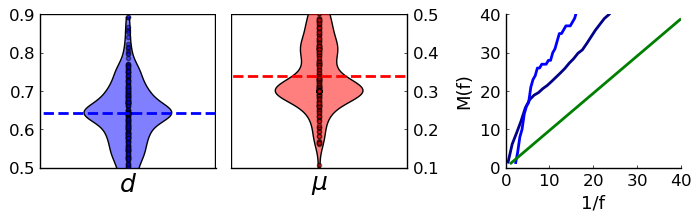

In [214]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 0.9)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.1, 0.5)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

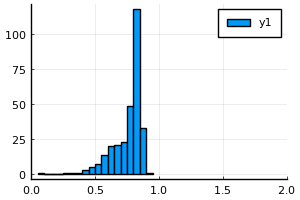

In [67]:
histogram( mus ./ (1 .- ds), size=(300,200), xlim=(0,2) )

0.6203644936586614
0.28341615997499775


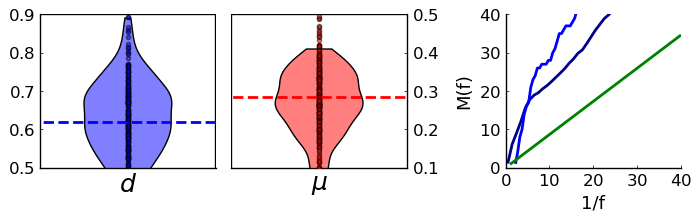

In [73]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 0.9)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.1, 0.5)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

0.6247824181045137
0.3876388119181945


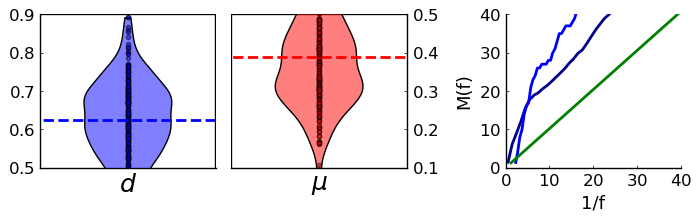

In [217]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 0.9)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.1, 0.5)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

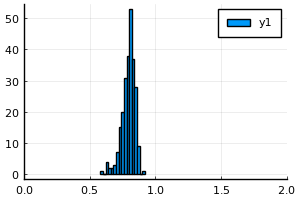

In [61]:
histogram( mus ./ (1 .- ds), size=(300,200), xlim=(0,2) )

> sub 35

0.6237030311102626
0.27778639647727965


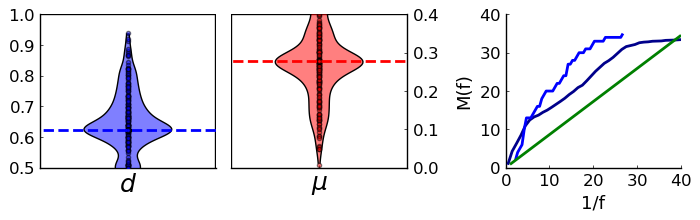

In [248]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 1.)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.0, 0.4)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

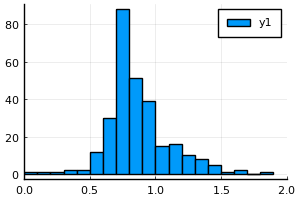

In [249]:
histogram( mus ./ (1 .- ds), size=(300,200), xlim=(0,2) )

## LICHeE clustering *

In [48]:
data = BSON.load("Turnover/turnover_data/Li_T1_inference_results_lichee.bson")

Dict{String, Any} with 8 entries:
  "mus"        => Any[0.669018, 0.677468, 0.433746, 0.675719, 0.434928, 0.58793…
  "notebook"   => "Turnover/turnover_expdata_Li.ipynb"
  "data"       => "experimental_data\\Li\\Li_data_T1_clones_lichee.tsv"
  "Wo"         => Any[0.5, 0.5, 0.5, 0.5, 0.5, 0.578947, 0.769231, 0.714286, 0.…
  "clustering" => "LICHeE"
  "Wa"         => Any[0.184397, 0.183486, 0.218623, 0.183673, 0.218391, 0.20645…
  "Ls"         => Any[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0…
  "ds"         => Any[0.927612, 0.926836, 0.949347, 0.926997, 0.949237, 0.94301…

0.9441699163177193
0.25722788890050685


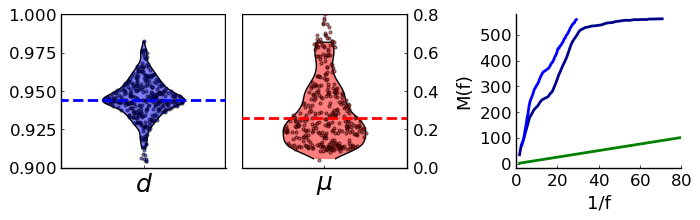

┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0, :auto)
└ @ Plots C:\Users\ArmanAngaji\.julia\packages\Plots\yJrrq\src\axes.jl:594
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0, :auto)
└ @ Plots C:\Users\ArmanAngaji\.julia\packages\Plots\yJrrq\src\axes.jl:594


In [49]:
mask = data["Ls"] .>= 0

p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], data["ds"][mask][ data["ds"][mask] .> quantile(data["ds"], 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], data["ds"][mask], c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(data["ds"][mask])], c=:blue, lw=2., style=:dash)
println(median(data["ds"][mask]))

xlim = (0.2, 1.8)
ylim = (0.0, 0.8)
yticks = range(ylim..., step=0.2)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(data["mus"][mask], 0.9), data["mus"][mask]), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], data["mus"][mask], c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(data["mus"][mask])], c=:red, lw=2., style=:dash)
println(median(data["mus"][mask]))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)

mutations = unique(vcat(sanger_lichee.mutations...))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
            plot!(p[end], 1:80, x-> x*median(data["ds"])/(1-median(data["mus"])), lw=2., lab="", c=:green)

In [7]:
N  /  (1-0.943)

2947.368421052629

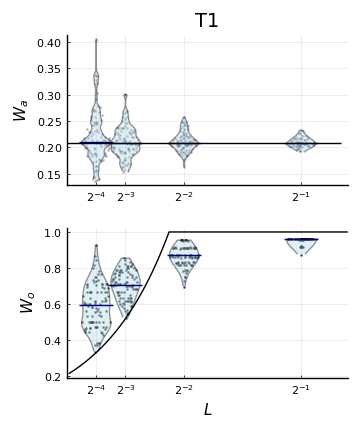

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [51]:
d = 0.944
mu = 0.257

scalex = 50

fig = plot_turnover_violin_vary_mu(data["Ls"]*mu, data["Wa"], data["Wo"]; N, d=d,
        distribution! = violin!, dots! = dotplot!, xlabel="L", xlim=[0.,0.6*mu],
        scalex=scalex, ms_median=25, size=(360,430), ms_dots = 1,markershape_median = :hline, layout=(2,1))

plot!(fig[1], xticks=(scalex*unique(data["Ls"])*mu,[L"2^{-4}",L"2^{-3}",L"2^{-2}",L"2^{-1}"]),  xlabel="", title="T1")
plot!(fig[2], xticks=(scalex*unique(data["Ls"])*mu,[L"2^{-4}",L"2^{-3}",L"2^{-2}",L"2^{-1}"]),  xlabel=L"L")

In [28]:
savefig("Turnover\\turnover_plots\\experimental_data\\Li_T1_lichee_turnover_varyL.pdf")

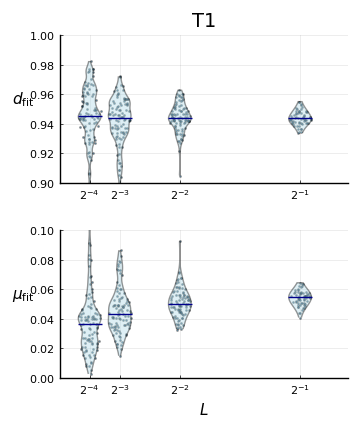

In [52]:
d = 0.943
mu = 0.257

scalex=17
fig = plot_infresult_violin_vary_mu(data["Ls"], data["ds"], data["mus"].*data["Ls"]; d=0, size=(360,430), 
        distribution! = violin!, dots! = dotplot!, xticks=unique(Ls),
        scalex=scalex, xlim=[0.,0.6], ylim_d=(0.9,1), ylim_mu=(0,0.1), ms_median=17, yticks_d=0:0.02:1,
    yticks_mu= collect(0.:0.02:0.1), ms_dots=1, markershape_median=:hline, layout=(2,1) )

plot!(fig[1], xticks=(scalex*unique(data["Ls"]),[L"2^{-4}",L"2^{-3}",L"2^{-2}",L"2^{-1}"]),  xlabel="", title="T1")
plot!(fig[2], xticks=(scalex*unique(data["Ls"]),[L"2^{-4}",L"2^{-3}",L"2^{-2}",L"2^{-1}"]),  xlabel=L"L")

In [32]:
savefig("Turnover\\turnover_plots\\experimental_data\\Li_T1_lichee_params_varyL.pdf")

### *old*

> L = 0.5

0.9697002736160492
0.06574836261068896


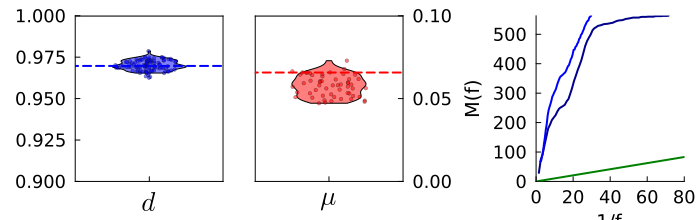

In [17]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.0, 0.1)
yticks = range(ylim..., step=0.05)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], mus, c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

> L = 0.3

0.9704703113329798
0.09271333654441918


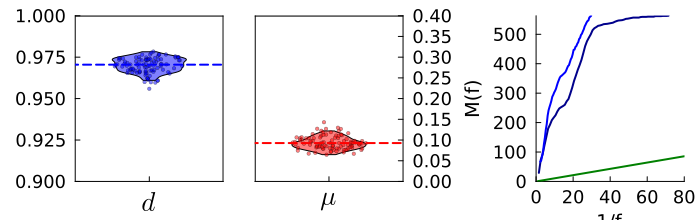

In [19]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.0, 0.4)
yticks = range(ylim..., step=0.05)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], mus, c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

> L = 0.1

0.9709664972542003
0.21085282999973218


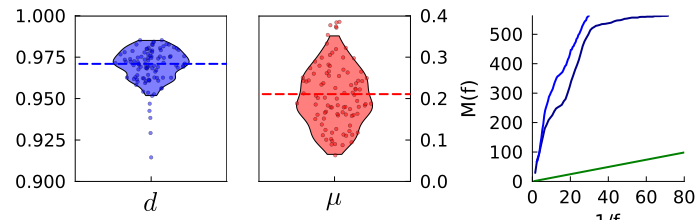

In [21]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.0, 0.4)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], mus, c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

> L = 0.05

0.97085222599005
0.3492237472837645


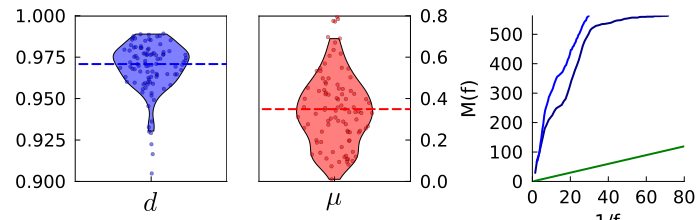

In [23]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.0, 0.8)
yticks = range(ylim..., step=0.2)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], mus, c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

0.9693299655830939
0.19704956747176863


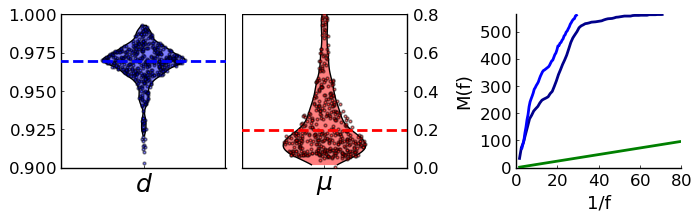

In [114]:
mask = Ls .>= 0

p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[mask][ ds[mask] .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], ds[mask], c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(ds[mask])], c=:blue, lw=2., style=:dash)
println(median(ds[mask]))

xlim = (0.2, 1.8)
ylim = (0.0, 0.8)
yticks = range(ylim..., step=0.2)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus[mask], 0.9), mus[mask]), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], mus[mask], c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(mus[mask])], c=:red, lw=2., style=:dash)
println(median(mus[mask]))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)

mutations = unique(vcat(sanger_lichee.mutations...))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

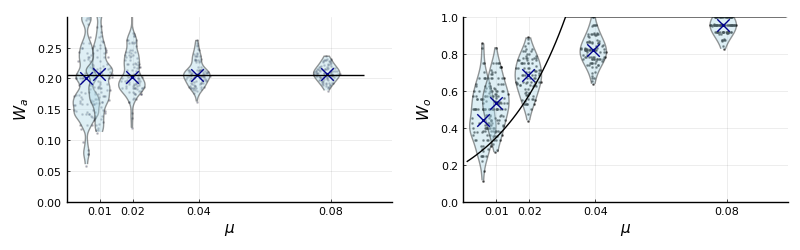

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [39]:
d = 0.969
mu = 0.197

# mu = 0.0755
# mu = 0.135
# mu = 0.23
# mu = 0.386
# mu = 0.5367

scalex = 100

fig = plot_turnover_violin_vary_mu(Ls*mu, Wa, Wo; N, d=d,
        distribution! = violin!, dots! = dotplot!, xlabel="L", xlim=[0.,0.5*mu], xticks=[0.01,0.02,0.04,0.08],
        scalex=scalex, ms_median=9, size=(800,250), ms_dots = 1)

In [40]:
savefig("Turnover\\turnover_plots\\experimental_data\\Li_lichee_turnover_varyL.pdf")

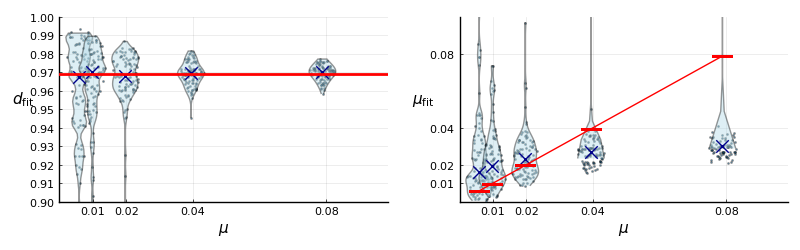

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [37]:
d = 0.969
mu = 0.197

# mu = 0.0755
# mu = 0.135
# mu = 0.23
# mu = 0.386
# mu = 0.5367

fig = plot_infresult_violin_vary_mu(Ls*mu, ds, mus.*Ls; d=d, size=(800,250), 
        distribution! = violin!, dots! = dotplot!, xticks=[0.01,0.02,0.04,0.08],
        scalex=100, xlim=[0.,0.5*mu], ylim_d=(0.9,1), ylim_mu=(0,0.1), ms_median=9, yticks_d=0:0.01:1, yticks_mu= [0.01,0.02,0.04,0.08], ms_dots=1 )

> upper cutoff 0.3

0.9820449312478188
0.11151130411433981


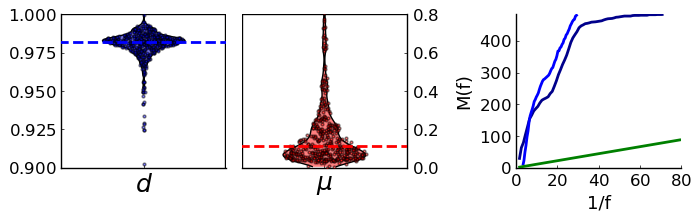

In [89]:
mask = Ls .>= 0

p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[mask][ ds[mask] .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], ds[mask], c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(ds[mask])], c=:blue, lw=2., style=:dash)
println(median(ds[mask]))

xlim = (0.2, 1.8)
ylim = (0.0, 0.8)
yticks = range(ylim..., step=0.2)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus[mask], 0.9), mus[mask]), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], mus[mask], c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(mus[mask])], c=:red, lw=2., style=:dash)
println(median(mus[mask]))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)

mutations = unique(vcat(sanger_lichee.mutations...))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

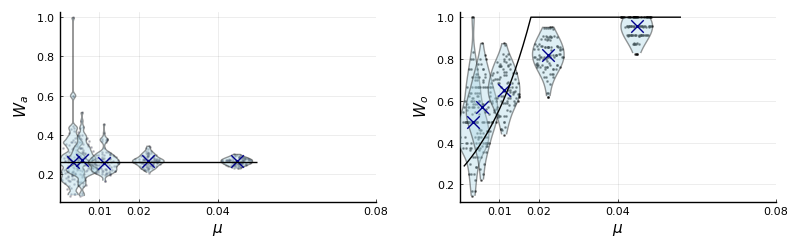

In [95]:
d = 0.982
mu = 0.112

fig = plot_turnover_violin_vary_mu(Ls*mu, Wa, Wo; N, d=d,
        distribution! = violin!, dots! = dotplot!, xlabel="L", xlim=[0.,0.5*mu], xticks=[0.01,0.02,0.04,0.08],
        scalex=100, ms_median=9, size=(800,250), ms_dots = 1)

In [96]:
savefig("Turnover\\turnover_plots\\experimental_data\\Li_T1_cut0.3__lichee_turnover_varyL.pdf")

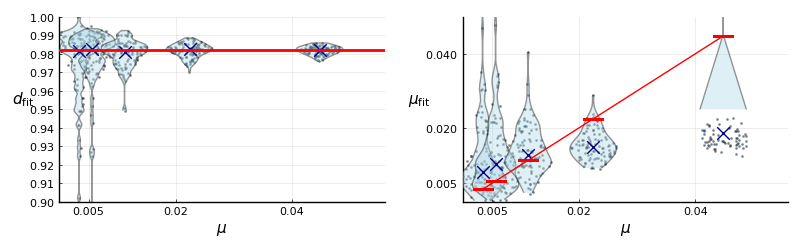

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [97]:
d = 0.982
mu = 0.112

fig = plot_infresult_violin_vary_mu(Ls*mu, ds, mus.*Ls; d=d, size=(800,250), 
        distribution! = violin!, dots! = dotplot!, xticks=[0.005,0.02,0.04],
        scalex=100, xlim=[0.,0.5*mu], ylim_d=(0.9,1), ylim_mu=(0,0.05), ms_median=9, yticks_d=0:0.01:1, yticks_mu= [0.005,0.02,0.04], ms_dots=1 )

In [98]:
savefig("Turnover\\turnover_plots\\experimental_data\\Li_T1_cut0.3_lichee_params_varyL.pdf")

# T2

## *simple/coincidence clustering*

> full

0.7077401423312014
0.25593272351235036


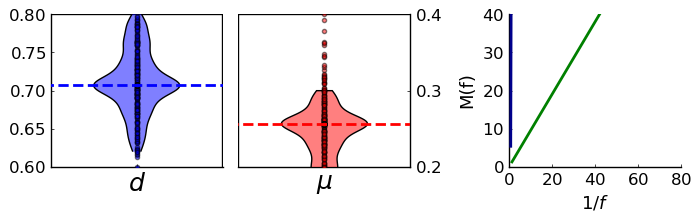

In [91]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.6, .8)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.2, 0.4)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

0.706357704633808
0.24765190843461216


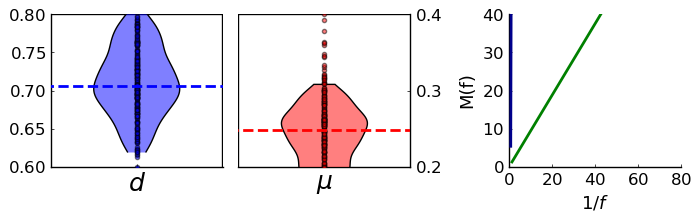

In [94]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.6, .8)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.2, 0.4)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

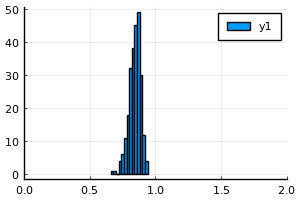

In [95]:
histogram( mus ./ (1 .- ds), size=(300,200), xlim=(0,2) )

> sub 100

0.7118012718585544
0.24323726990383576


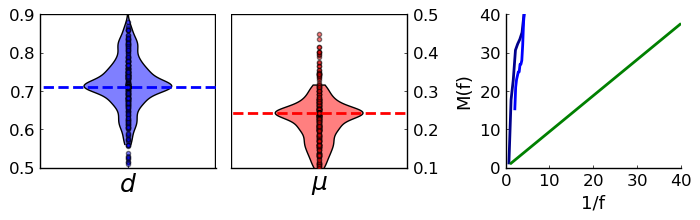

In [100]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 0.9)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.1, 0.5)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

0.7118012718585544
0.2829715788808419


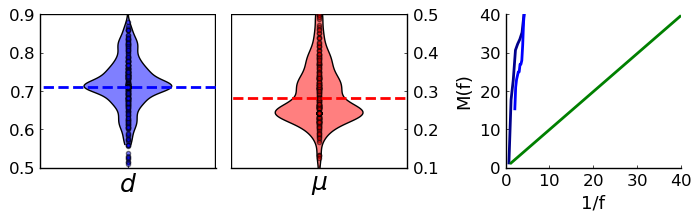

In [231]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 0.9)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.1, 0.5)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

0.7162094318442077
0.2291890080135447


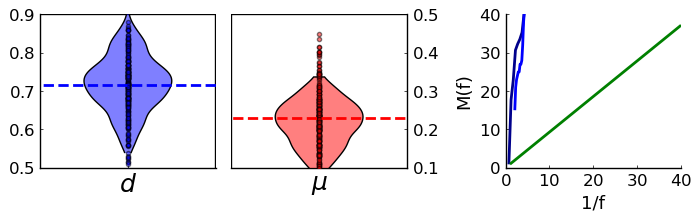

In [103]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 0.9)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.1, 0.5)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

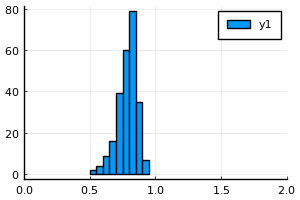

In [104]:
histogram( mus ./ (1 .- ds), size=(300,200), xlim=(0,2) )

> sub 50

0.7018826147933629
0.2559540962069539


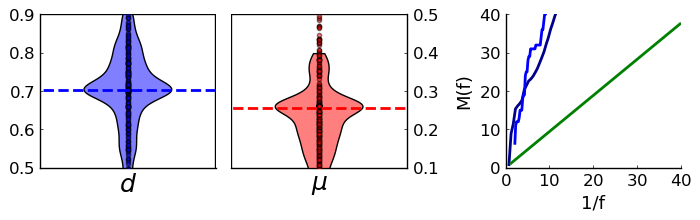

In [109]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 0.9)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.1, 0.5)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

0.7018826147933629
0.26649256734342974


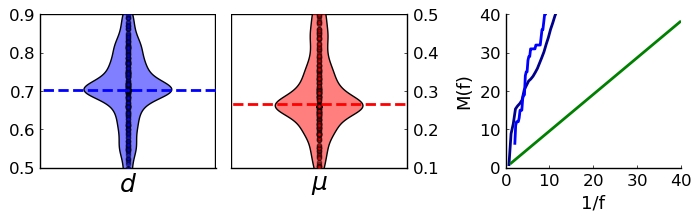

In [224]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 0.9)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.1, 0.5)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

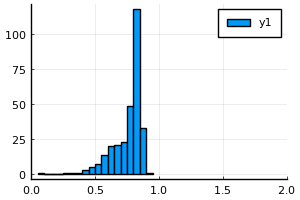

In [67]:
histogram( mus ./ (1 .- ds), size=(300,200), xlim=(0,2) )

0.7018826147933629
0.23102516138740117


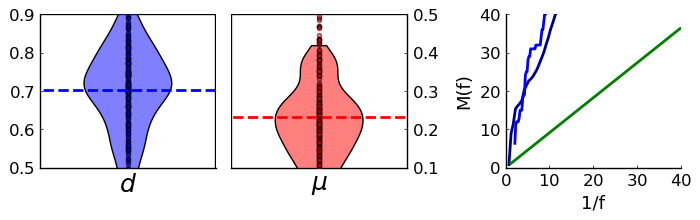

In [111]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 0.9)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.1, 0.5)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

0.7063067923233356
0.3010233654610043


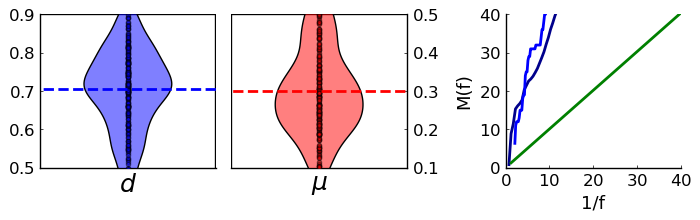

In [226]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 0.9)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.1, 0.5)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

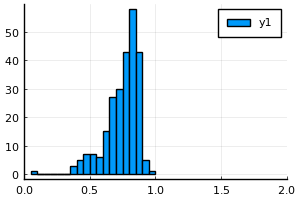

In [112]:
histogram( mus ./ (1 .- ds), size=(300,200), xlim=(0,2) )

> sub 35

0.8479352003063672
0.10153956633088367


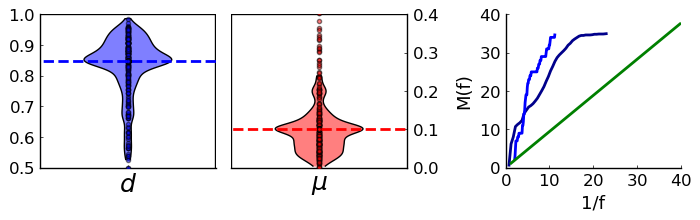

In [240]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.5, 1.)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
scatter!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 3)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.0, 0.4)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
scatter!(p[2], [1], mus, c=:red, alpha=0.5, ms = 3)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/40
plot!(p[end], tickfontsize=12, labelfontsize=13)
mutations = union(sanger_coinc.mutations...)
M!(p[end], collect(values(freqs)), nbins=50, lab="wes scaled", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,40), c=:darkblue, scale=length(mutations)/length(freqs))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:40, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

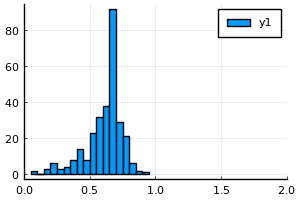

In [241]:
histogram( mus ./ (1 .- ds), size=(300,200), xlim=(0,2) )

## LICHeE clustering *

In [57]:
data = BSON.load("Turnover/turnover_data/Li_T2_inference_results_lichee.bson")

Dict{String, Any} with 8 entries:
  "mus"        => Any[0.439337, 0.560769, 0.0211385, 0.0199308, 0.0593791, 0.07…
  "notebook"   => "Turnover/turnover_expdata_Li.ipynb"
  "data"       => "experimental_data\\Li\\Li_data_T2_clones_lichee.tsv"
  "Wo"         => Any[0.571429, 0.285714, 0.6, 0.571429, 0.666667, 0.666667, 0.…
  "clustering" => "LICHeE"
  "Wa"         => Any[0.236842, 0.153846, 0.5625, 0.537037, 0.555556, 0.526316,…
  "Ls"         => Any[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0…
  "ds"         => Any[0.954603, 0.888229, 0.988209, 0.987505, 0.988026, 0.98718…

0.9766031402543297
0.08465936686370723


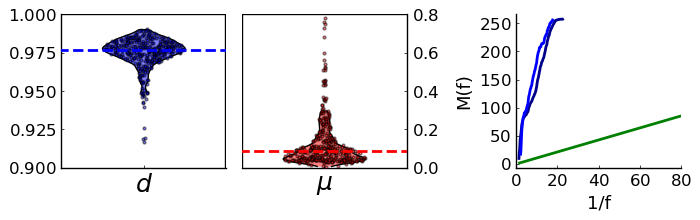

┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0, :auto)
└ @ Plots C:\Users\ArmanAngaji\.julia\packages\Plots\yJrrq\src\axes.jl:594
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0, :auto)
└ @ Plots C:\Users\ArmanAngaji\.julia\packages\Plots\yJrrq\src\axes.jl:594


In [59]:
mask = data["Ls"] .>= 0

p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], data["ds"][mask][ data["ds"][mask] .> quantile(data["ds"], 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], data["ds"][mask], c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(data["ds"][mask])], c=:blue, lw=2., style=:dash)
println(median(data["ds"][mask]))

xlim = (0.2, 1.8)
ylim = (0.0, 0.8)
yticks = range(ylim..., step=0.2)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(data["mus"][mask], 0.9), data["mus"][mask]), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], data["mus"][mask], c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(data["mus"][mask])], c=:red, lw=2., style=:dash)
println(median(data["mus"][mask]))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)

mutations = unique(vcat(sanger_lichee.mutations...))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
            plot!(p[end], 1:80, x-> x*median(data["ds"])/(1-median(data["mus"])), lw=2., lab="", c=:green)

In [13]:
N, N/(1-0.976)

(159.0, 6624.9999999999945)

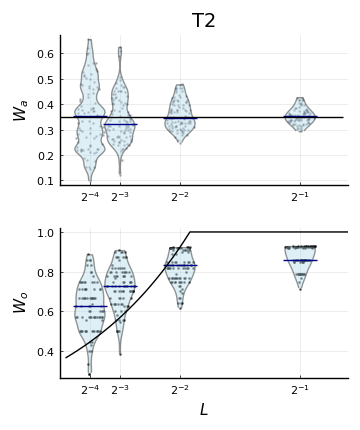

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [68]:
d = 0.977
mu = 0.085

scalex = 150

fig = plot_turnover_violin_vary_mu(data["Ls"]*mu, data["Wa"], data["Wo"]; N, d=d,
        distribution! = violin!, dots! = dotplot!, xlabel="L", xlim=[0.,0.6*mu],
        scalex=scalex, ms_median=25, size=(360,430), ms_dots = 1,markershape_median = :hline, layout=(2,1))

plot!(fig[1], xticks=(scalex*unique(data["Ls"])*mu,[L"2^{-4}",L"2^{-3}",L"2^{-2}",L"2^{-1}"]),  xlabel="", title="T2")
plot!(fig[2], xticks=(scalex*unique(data["Ls"])*mu,[L"2^{-4}",L"2^{-3}",L"2^{-2}",L"2^{-1}"]),  xlabel=L"L")

In [69]:
savefig("Turnover\\turnover_plots\\experimental_data\\Li_T2_lichee_turnover_varyL.pdf")

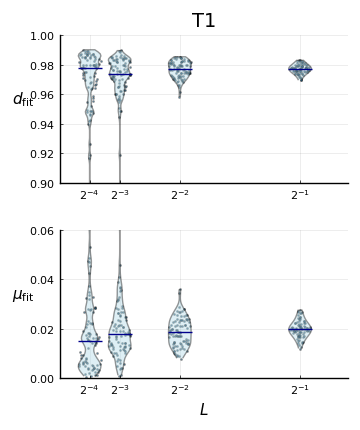

In [77]:
scalex=17
fig = plot_infresult_violin_vary_mu(data["Ls"], data["ds"], data["mus"].*data["Ls"]; d=0, size=(360,430), 
        distribution! = violin!, dots! = dotplot!, xticks=unique(Ls),
        scalex=scalex, xlim=[0.,0.6], ylim_d=(0.9,1), ylim_mu=(0,0.06), ms_median=17, yticks_d=0:0.02:1,
    yticks_mu= collect(0.:0.02:0.1), ms_dots=1, markershape_median=:hline, layout=(2,1) )

plot!(fig[1], xticks=(scalex*unique(data["Ls"]),[L"2^{-4}",L"2^{-3}",L"2^{-2}",L"2^{-1}"]),  xlabel="", title="T1")
plot!(fig[2], xticks=(scalex*unique(data["Ls"]),[L"2^{-4}",L"2^{-3}",L"2^{-2}",L"2^{-1}"]),  xlabel=L"L")

In [78]:
savefig("Turnover\\turnover_plots\\experimental_data\\Li_T2_lichee_params_varyL.pdf")

### *old*

> L = 0.5

0.9883821775438171
0.021279360312448814


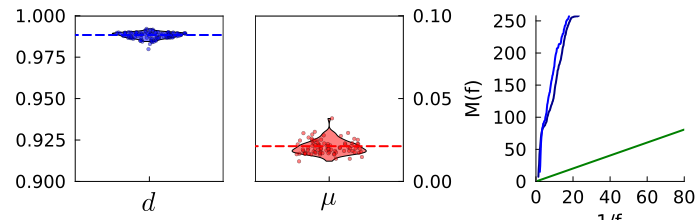

In [36]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.0, 0.1)
yticks = range(ylim..., step=0.05)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], mus, c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

> L = 0.3

0.9882002027579899
0.034070311137072665


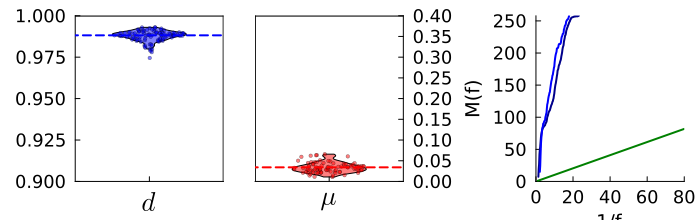

In [38]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.0, 0.4)
yticks = range(ylim..., step=0.05)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], mus, c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

> L = 0.1

0.9884601019998358
0.07048919238210605


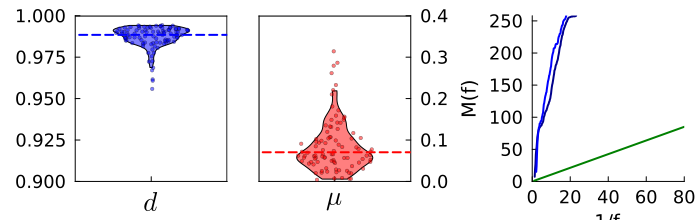

In [40]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.0, 0.4)
yticks = range(ylim..., step=0.1)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], mus, c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

> L = 0.05

0.9873871083932024
0.12299538624302518


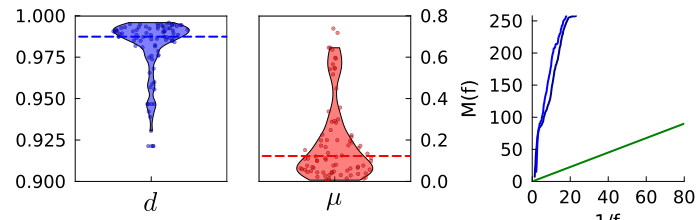

In [42]:
p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[ ds .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], ds, c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(ds)], c=:blue, lw=2., style=:dash)
println(median(ds))

xlim = (0.2, 1.8)
ylim = (0.0, 0.8)
yticks = range(ylim..., step=0.2)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus, 0.9), mus), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], mus, c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(mus)], c=:red, lw=2., style=:dash)
println(median(mus))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

0.9875533724519499
0.05995715475370088


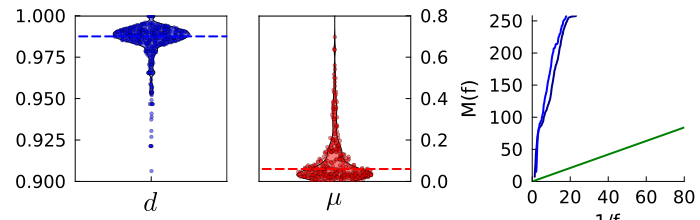

In [50]:
mask = Ls .>= 0

p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[mask][ ds[mask] .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], ds[mask], c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(ds[mask])], c=:blue, lw=2., style=:dash)
println(median(ds[mask]))

xlim = (0.2, 1.8)
ylim = (0.0, 0.8)
yticks = range(ylim..., step=0.2)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus[mask], 0.9), mus[mask]), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], mus[mask], c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(mus[mask])], c=:red, lw=2., style=:dash)
println(median(mus[mask]))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)

mutations = unique(vcat(sanger_lichee.mutations...))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

In [77]:
unique(Ls)

5-element Vector{Any}:
 0.03
 0.05
 0.1
 0.2
 0.4

0.9873871083932024
0.30953875905583483


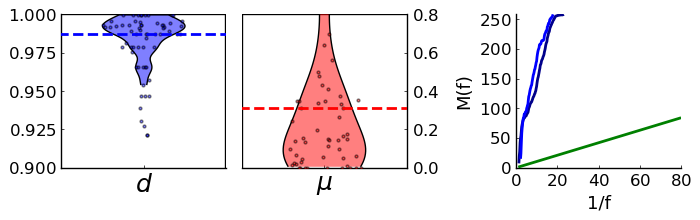

In [82]:
mask = Ls .== 0.03

p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[mask][ ds[mask] .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], ds[mask], c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(ds[mask])], c=:blue, lw=2., style=:dash)
println(median(ds[mask]))

xlim = (0.2, 1.8)
ylim = (0.0, 0.8)
yticks = range(ylim..., step=0.2)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus[mask], 0.9), mus[mask]), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], mus[mask], c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(mus[mask])], c=:red, lw=2., style=:dash)
println(median(mus[mask]))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)

mutations = unique(vcat(sanger_lichee.mutations...))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

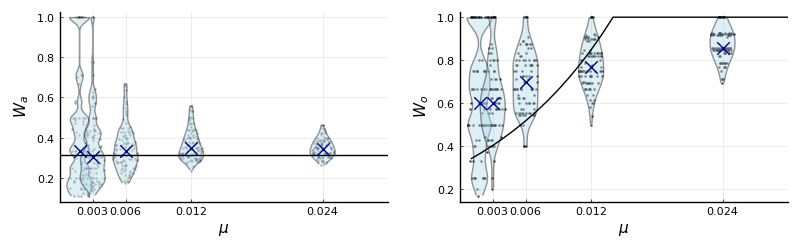

In [72]:
d = 0.986
mu = 0.06

# mu = 0.02698
# mu = 0.04487
# mu = 0.09391
# mu = 0.172
# mu = 0.30953

fig = plot_turnover_violin_vary_mu(Ls*mu, Wa, Wo; N, d=d,
        distribution! = violin!, dots! = dotplot!, xlabel="L", xlim=[0.,0.5*mu], xticks=[0.003,0.006,0.012,0.024],
        scalex=350, ms_median=9, size=(800,250), ms_dots = 1)

In [73]:
savefig("Turnover\\turnover_plots\\experimental_data\\Li_T2_lichee_turnover_varyL.pdf")

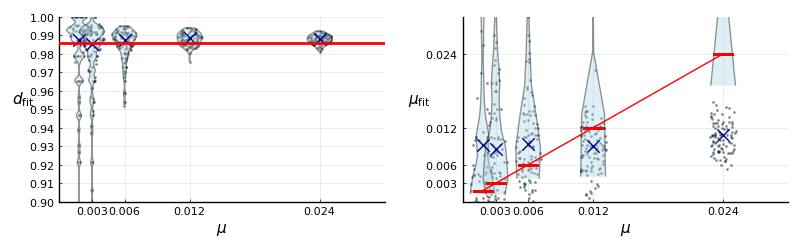

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [74]:
d = 0.986
mu = 0.06

# mu = 0.02698
# mu = 0.04487
# mu = 0.09391
# mu = 0.172
# mu = 0.30953

fig = plot_infresult_violin_vary_mu(Ls*mu, ds, mus.*Ls; d=d, size=(800,250), 
        distribution! = violin!, dots! = dotplot!, xticks=[0.003,0.006,0.012,0.024],
        scalex=350, xlim=[0.,0.5*mu], ylim_d=(0.9,1), ylim_mu=(0,0.03), ms_median=9, yticks_d=0:0.01:1, yticks_mu= [0.003,0.006,0.012,0.024], ms_dots=1 )

In [75]:
savefig("Turnover\\turnover_plots\\experimental_data\\Li_T2_lichee_params_varyL.pdf")

> upper cutoff 0.3

0.9949660615115722
0.02683605579375247


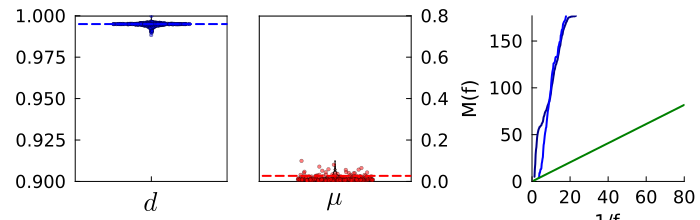

In [120]:
mask = Ls .>= 0

p = plot(layout=(1,3), size=(700,220), legend=:none, grid=false, ytickfontsize=12, margin=2Plots.mm)

ylim = (0.9, 1.0)
xlim = (0.2, 1.8)
plot!(p[1], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, xticks=([1],[L"d"]))
hline!(p[1], [ylim[2]], c=:black, lw=1.7)
vline!(p[1], [xlim[2]], c=:black, lw=1.7)
violin!(p[1], [1], ds[mask][ ds[mask] .> quantile(ds, 0.05)], c=:blue, fillalpha=0.5)
dotplot!(p[1], [1], ds[mask], c=:blue, alpha=0.5, ms = 2)
hline!(p[1], [median(ds[mask])], c=:blue, lw=2., style=:dash)
println(median(ds[mask]))

xlim = (0.2, 1.8)
ylim = (0.0, 0.8)
yticks = range(ylim..., step=0.2)
plot!(p[2], legend=:none, xlim=xlim, xtickfontsize=18, ylim=ylim, yticks=yticks, xticks=([1],[L"\mu"]), ymirror=true)
hline!(p[2], [ylim[2]], c=:black, lw=1.7)
vline!(p[2], [xlim[1]], c=:black, lw=1.7)
violin!(p[2], [1], filter( mu -> mu < quantile(mus[mask], 0.9), mus[mask]), c=:red, fillalpha=0.5)
dotplot!(p[2], [1], mus[mask], c=:red, alpha=0.5, ms = 2)
hline!(p[2], [median(mus[mask])], c=:red, lw=2., style=:dash)
println(median(mus[mask]))

res = 1/80
plot!(p[end], tickfontsize=12, labelfontsize=13)
M!(p[end], SeqDataFormatting.mfreqs(wes).frequency, nbins=50, lab="wes", xlab=L"1/f", ylab=L"M(f)",
    lw=2., xlim=(0, 1/res ), ylim=(0,:auto), c=:darkblue, scale=Lmax)

mutations = unique(vcat(sanger_lichee.mutations...))
M!(p[end], [freqs[m] for m in mutations], lw=2., lab="wes filtered", c=:blue)
plot!(p[end], 1:80, x-> x*median(ds)/(1-median(mus)), lw=2., lab="", c=:green)

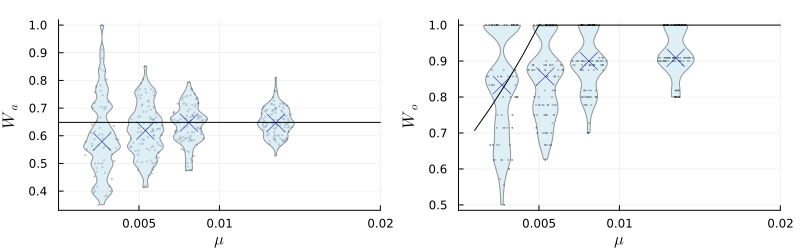

In [126]:
d = 0.995
mu = 0.027

fig = plot_turnover_violin_vary_mu(Ls*mu, Wa, Wo; N, d=d,
        distribution! = violin!, dots! = dotplot!, xlabel="L", xlim=[0.,0.02], xticks=[0.005,0.01,0.02],
        scalex=350, ms_median=9, size=(800,250), ms_dots = 1)

In [96]:
# savefig("Turnover\\turnover_plots\\experimental_data\\Li_T1_cut0.3_lichee_turnover_varyL.pdf")

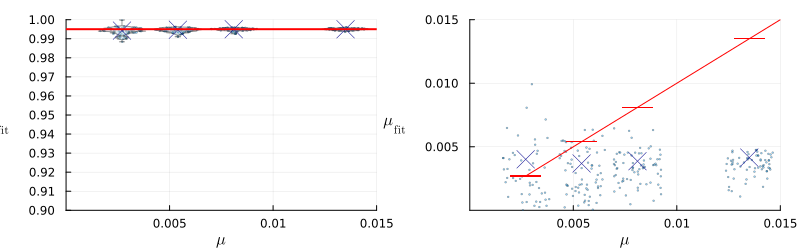

In [139]:
d = 0.995
mu = 0.027

fig = plot_infresult_violin_vary_mu(Ls*mu, ds, mus.*Ls; d=d, size=(800,250), 
        distribution! = violin!, dots! = dotplot!, xticks=[0.005,0.01,0.015],
        scalex=350, xlim=[0.,0.015], ylim_d=(0.9,1), ylim_mu=(0,0.015), ms_median=9, yticks_d=0:0.01:1, yticks_mu= [0.005,0.01,0.015], ms_dots=1 )

In [98]:
# savefig("Turnover\\turnover_plots\\experimental_data\\Li_T1_cut0.3_lichee_params_varyL.pdf")